<span style="font-family: Century Gothic"> Load libraries</span>


In [3]:
import pandas as pd
import openpyxl
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

### <span style="font-family: Century Gothic"> Load and Explore the Dataset</span>

- <span style="font-family: Century Gothic"> Initial exploration to understand the structure, features, and potential issues </span>
- <span style="font-family: Century Gothic">Use libraries like Pandas to load the dataset.</span>
- <span style="font-family: Century Gothic">Check the size of the dataset (number of rows and columns).</span>
- <span style="font-family: Century Gothic">Inspect the first few rows to understand the features and their formats.</span>

In [4]:
# Load the dataset
df_matric = pd.read_csv('Data/FUNCTIONAL_CONNECTOME_MATRICES.csv')
df_labels = pd.read_excel('Data/LABELS.xlsx')
df_meta_a = pd.read_excel('Data/METADATA_A.xlsx')
df_meta_b = pd.read_excel('Data/METADATA_b.xlsx')

df_dictionary = pd.read_excel('Data Dictionary.xlsx')

### <span style="font-family: Century Gothic"> Data Dictionary</span>
#### <p style="font-family: Century Gothic; font-size: 15px">Purpose: Understand the variables in the dataset.</p>

- <span style="font-family: Century Gothic; font-size: 15px"> Inspect the file to see how variables are described.</span>
- <span style="font-family: Century Gothic; font-size: 15px">Identify key variables.</span>

In [5]:
# Inspect the first few rows
df_dictionary.head(2)

,DataType,Instrument,Field,Description,Type,Labels
0,METADATA A,NaN,NaN,NaN,NaN,NaN
1,NaN,Identifier,participant_id,Participant ID,str,NaN


In [6]:
df_dictionary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DataType     32 non-null     object
 1   Instrument   31 non-null     object
 2   Field        31 non-null     object
 3   Description  31 non-null     object
 4   Type         31 non-null     object
 5   Labels       11 non-null     object
dtypes: object(6)
memory usage: 1.9+ KB


In [7]:
df_dictionary.describe()

,DataType,Instrument,Field,Description,Type,Labels
count,32,31,31,31,31,11
unique,6,11,30,30,4,9
top,Quantitative,Strength and Difficulties Questionnaire,participant_id,Participant ID,int,"0=Homemaker, stay at home parent.\n5=Day labor..."
freq,18,9,2,2,17,2


In [68]:
df_dictionary.DataType.value_counts()

DataType
Quantitative    18
Categorical      9
Target           2
METADATA A       1
METADATA B       1
TARGETS          1
Name: count, dtype: int64

In [69]:
df_dictionary_copy = df_dictionary.copy()

# Filter rows by DataType
df_dictionary_meta_a = df_dictionary_copy[df_dictionary_copy['DataType'] == 'Quantitative']
df_dictionary_meta_b = df_dictionary_copy[df_dictionary_copy['DataType'] == 'Categorical ']
df_dictionary_target = df_dictionary_copy[df_dictionary_copy['DataType'] == 'Target']

In [71]:
df_dictionary_target

,DataType,Instrument,Field,Description,Type,Labels
35,Target,Diagnosis:ADHD_type,ADHD_Outcome,Type of Diagnosis,str,"0= Other/None, 1=ADHD"
36,Target,"Demographics:Basic_Demos,Sex",Sex_F,Sex of participant,categorical int,0=Male\n1=Female


### <span style="font-family: Century Gothic">Labels</span>
#### <p style="font-family: Century Gothic; font-size: 15px">Purpose: Contains the target variables.</p>
- <span style="font-family: Century Gothic; font-size: 15px">Check the structure of the file.</span>
- <span style="font-family: Century Gothic; font-size: 15px">Identify the columns for ADHD diagnosis and sex.</span>
- <span style="font-family: Century Gothic; font-size: 15px">Check for missing values or inconsistencies.</span>

In [8]:
df_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   participant_id  1213 non-null   object
 1   ADHD_Outcome    1213 non-null   int64 
 2   Sex_F           1213 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 28.6+ KB


In [9]:
df_labels.describe()

,ADHD_Outcome,Sex_F
count,1213.000000,1213.000000
mean,0.685078,0.342951
std,0.464676,0.474891
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [74]:
df_labels.head(3)

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0


In [82]:
df_labels.shape

(1213, 3)

In [76]:
df_labels.isnull().sum()

participant_id    0
ADHD_Outcome      0
Sex_F             0
dtype: int64

In [ ]:
# 0= Other/None, 1=ADHD
df_labels.ADHD_Outcome.value_counts()

ADHD_Outcome
1    831
0    382
Name: count, dtype: int64

In [ ]:
# 0=Male, 1=Female
df_labels.Sex_F.value_counts()

Sex_F
0    797
1    416
Name: count, dtype: int64

In [ ]:
# This code snippet is filtering a DataFrame `df_labels` to select rows where the "ADHD_Outcome" column has a value of 1 (indicating ADHD) and the "Sex_F" column has a value of 0 (indicating male gender).

df_male_with_adhd = df_labels[(df_labels["ADHD_Outcome"] == 1) & (df_labels["Sex_F"] == 0)]
df_male_with_adhd.shape

(581, 3)

In [ ]:
# This code snippet is filtering a DataFrame `df_labels` to select rows where the "ADHD_Outcome" column has a value of 1 (indicating ADHD) and the "Sex_F" column has a value of 1 (indicating female gender).

df_female_with_adhd = df_labels[(df_labels["ADHD_Outcome"] == 1) & (df_labels["Sex_F"] == 1)]
df_female_with_adhd.shape

(250, 3)

### <span style="font-family: Century Gothic">Meta A and Meta B</span>
#### <p style="font-family: Century Gothic; font-size: 15px">Purpose: Contains additional metadata about the subjects.</p>
- <span style="font-family: Century Gothic; font-size: 15px">Inspect the files to understand the features.</span>
- <span style="font-family: Century Gothic; font-size: 15px">Check for missing values and inconsistencies.</span>
- <span style="font-family: Century Gothic; font-size: 15px">Merge these files if they contain complementary information.</span>

In [10]:
df_meta_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              1213 non-null   object 
 1   EHQ_EHQ_Total               1213 non-null   float64
 2   ColorVision_CV_Score        1213 non-null   int64  
 3   APQ_P_APQ_P_CP              1213 non-null   int64  
 4   APQ_P_APQ_P_ID              1213 non-null   int64  
 5   APQ_P_APQ_P_INV             1213 non-null   int64  
 6   APQ_P_APQ_P_OPD             1213 non-null   int64  
 7   APQ_P_APQ_P_PM              1213 non-null   int64  
 8   APQ_P_APQ_P_PP              1213 non-null   int64  
 9   SDQ_SDQ_Conduct_Problems    1213 non-null   int64  
 10  SDQ_SDQ_Difficulties_Total  1213 non-null   int64  
 11  SDQ_SDQ_Emotional_Problems  1213 non-null   int64  
 12  SDQ_SDQ_Externalizing       1213 non-null   int64  
 13  SDQ_SDQ_Generating_Impact   1213 

In [11]:
df_meta_a.describe()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,853.000000
mean,58.876917,13.164880,3.781533,13.205276,39.374279,17.785655,16.393240,25.246496,2.059357,12.122836,2.307502,7.557296,4.073372,5.497939,4.565540,2.258038,7.683430,11.245678
std,49.855501,2.780624,1.376700,3.811772,6.245928,3.764112,5.376994,3.950529,2.023322,6.577207,2.167549,4.166627,2.819731,2.836764,3.519634,2.090414,2.190295,3.234372
min,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.600000,14.000000,3.000000,11.000000,36.000000,16.000000,13.000000,23.000000,0.000000,7.000000,1.000000,4.000000,2.000000,4.000000,2.000000,0.000000,6.000000,8.803901
50%,76.670000,14.000000,3.000000,13.000000,40.000000,18.000000,16.000000,26.000000,2.000000,12.000000,2.000000,7.000000,4.000000,6.000000,4.000000,2.000000,8.000000,10.739219
75%,93.400000,14.000000,4.000000,16.000000,43.000000,20.000000,19.000000,28.000000,3.000000,17.000000,4.000000,10.000000,6.000000,8.000000,7.000000,4.000000,10.000000,13.460871
max,100.000000,14.000000,12.000000,28.000000,50.000000,28.000000,37.000000,30.000000,10.000000,34.000000,10.000000,20.000000,10.000000,10.000000,17.000000,9.000000,10.000000,21.564453


In [101]:
df_meta_a.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679


In [12]:
df_meta_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1202 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   int64  
 5   MRI_Track_Scan_Location           1213 non-null   int64  
 6   Barratt_Barratt_P1_Edu            1213 non-null   int64  
 7   Barratt_Barratt_P1_Occ            1213 non-null   int64  
 8   Barratt_Barratt_P2_Edu            1213 non-null   int64  
 9   Barratt_Barratt_P2_Occ            1213 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 94.9+ KB


In [13]:
df_meta_b.describe()

,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
count,1213.000000,1213.000000,1202.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,2017.652102,2.014839,0.424293,2.080791,2.288541,17.641385,24.892828,14.122012,24.719703
std,1.122522,1.135147,0.687470,3.164636,0.758348,4.004639,17.025899,7.201023,17.171113
min,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,1.000000,0.000000,0.000000,2.000000,15.000000,0.000000,12.000000,5.000000
50%,2018.000000,1.000000,0.000000,0.000000,2.000000,18.000000,30.000000,18.000000,30.000000
75%,2019.000000,3.000000,1.000000,2.000000,3.000000,21.000000,40.000000,21.000000,40.000000
max,2020.000000,4.000000,3.000000,11.000000,4.000000,21.000000,45.000000,21.000000,45.000000


In [106]:
df_meta_b.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


In [96]:
df_meta_a.isnull().sum()

participant_id                  0
EHQ_EHQ_Total                   0
ColorVision_CV_Score            0
APQ_P_APQ_P_CP                  0
APQ_P_APQ_P_ID                  0
APQ_P_APQ_P_INV                 0
APQ_P_APQ_P_OPD                 0
APQ_P_APQ_P_PM                  0
APQ_P_APQ_P_PP                  0
SDQ_SDQ_Conduct_Problems        0
SDQ_SDQ_Difficulties_Total      0
SDQ_SDQ_Emotional_Problems      0
SDQ_SDQ_Externalizing           0
SDQ_SDQ_Generating_Impact       0
SDQ_SDQ_Hyperactivity           0
SDQ_SDQ_Internalizing           0
SDQ_SDQ_Peer_Problems           0
SDQ_SDQ_Prosocial               0
MRI_Track_Age_at_Scan         360
dtype: int64

In [97]:
df_meta_b.isnull().sum()

participant_id                       0
Basic_Demos_Enroll_Year              0
Basic_Demos_Study_Site               0
PreInt_Demos_Fam_Child_Ethnicity    11
PreInt_Demos_Fam_Child_Race          0
MRI_Track_Scan_Location              0
Barratt_Barratt_P1_Edu               0
Barratt_Barratt_P1_Occ               0
Barratt_Barratt_P2_Edu               0
Barratt_Barratt_P2_Occ               0
dtype: int64

In [204]:
df_meta = pd.merge(df_meta_a, df_meta_b, on='participant_id', how='outer')
df_meta.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,MRI_Track_Age_at_Scan,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,00aIpNTbG5uh,100.00,13,3,15,44,14,20,27,3,...,14.274127,2019,4,1.0,0,3,21,45,0,0
1,00fV0OyyoLfw,92.27,14,3,12,35,25,28,30,5,...,NaN,2017,1,0.0,9,2,21,0,21,45
2,04X1eiS79T4B,86.67,14,3,21,37,18,26,28,3,...,13.463381,2017,1,1.0,2,2,9,0,0,0
3,05ocQutkURd6,93.34,14,3,11,42,15,20,28,0,...,9.572553,2018,1,3.0,8,2,18,10,18,0
4,06YUNBA9ZRLq,0.00,14,8,12,35,22,12,24,6,...,6.654574,2018,1,0.0,1,2,12,0,0,0


In [205]:
df_meta.isnull().sum()

participant_id                        0
EHQ_EHQ_Total                         0
ColorVision_CV_Score                  0
APQ_P_APQ_P_CP                        0
APQ_P_APQ_P_ID                        0
APQ_P_APQ_P_INV                       0
APQ_P_APQ_P_OPD                       0
APQ_P_APQ_P_PM                        0
APQ_P_APQ_P_PP                        0
SDQ_SDQ_Conduct_Problems              0
SDQ_SDQ_Difficulties_Total            0
SDQ_SDQ_Emotional_Problems            0
SDQ_SDQ_Externalizing                 0
SDQ_SDQ_Generating_Impact             0
SDQ_SDQ_Hyperactivity                 0
SDQ_SDQ_Internalizing                 0
SDQ_SDQ_Peer_Problems                 0
SDQ_SDQ_Prosocial                     0
MRI_Track_Age_at_Scan               360
Basic_Demos_Enroll_Year               0
Basic_Demos_Study_Site                0
PreInt_Demos_Fam_Child_Ethnicity     11
PreInt_Demos_Fam_Child_Race           0
MRI_Track_Scan_Location               0
Barratt_Barratt_P1_Edu                0


### <span style="font-family: Century Gothic">Split and Explore the data</span>

- <span style="font-family: Century Gothic; font-size: 15px">Separate a subset of the data (e.g., 20%) for final testing. This ensures you don’t overfit during exploration and preprocessing.</span>
- <span style="font-family: Century Gothic; font-size: 15px">Check for missing values, outliers, and data types.</span>
- <span style="font-family: Century Gothic; font-size: 15px">Summarize the dataset (e.g., mean, median, standard deviation for numerical features; frequency counts for categorical features).</span>
-  <span style="font-family: Century Gothic; font-size: 15px">Visualize distributions of key features (e.g., histograms, box plots).</span>

In [206]:
# This line of code is splitting the DataFrame `df_meta` into two separate datasets, `train_data` and `test_data`, using the `train_test_split` function. The `train_size=0.2` parameter specifies that 20% of the data will be allocated to the training set (`train_data`), while the remaining 80% will be allocated to the test set (`test_data`). The `random_state=42` parameter sets a seed for the random number generator to ensure reproducibility of the split.
train_data, test_data = train_test_split(df_meta, train_size=0.2, random_state=42)                       

In [207]:
train_data.isnull().sum()

participant_id                       0
EHQ_EHQ_Total                        0
ColorVision_CV_Score                 0
APQ_P_APQ_P_CP                       0
APQ_P_APQ_P_ID                       0
APQ_P_APQ_P_INV                      0
APQ_P_APQ_P_OPD                      0
APQ_P_APQ_P_PM                       0
APQ_P_APQ_P_PP                       0
SDQ_SDQ_Conduct_Problems             0
SDQ_SDQ_Difficulties_Total           0
SDQ_SDQ_Emotional_Problems           0
SDQ_SDQ_Externalizing                0
SDQ_SDQ_Generating_Impact            0
SDQ_SDQ_Hyperactivity                0
SDQ_SDQ_Internalizing                0
SDQ_SDQ_Peer_Problems                0
SDQ_SDQ_Prosocial                    0
MRI_Track_Age_at_Scan               66
Basic_Demos_Enroll_Year              0
Basic_Demos_Study_Site               0
PreInt_Demos_Fam_Child_Ethnicity     1
PreInt_Demos_Fam_Child_Race          0
MRI_Track_Scan_Location              0
Barratt_Barratt_P1_Edu               0
Barratt_Barratt_P1_Occ   

In [208]:
train_data.describe()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,...,MRI_Track_Age_at_Scan,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,...,176.000000,242.000000,242.000000,241.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,57.123926,13.024793,3.652893,12.966942,38.611570,17.462810,16.103306,24.971074,1.855372,11.330579,...,11.050584,2017.632231,2.066116,0.385892,1.818182,2.252066,18.049587,27.458678,14.404959,25.495868
std,52.033175,3.180498,1.324589,3.920229,7.482064,4.196504,5.841765,4.710189,1.853491,6.361044,...,3.337273,1.174184,1.178898,0.668057,3.077154,0.777334,3.604633,16.144072,7.174851,17.005063
min,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.667500,14.000000,3.000000,11.000000,36.000000,15.000000,12.000000,23.000000,0.000000,7.000000,...,8.593286,2017.000000,1.000000,0.000000,0.000000,2.000000,18.000000,16.250000,12.000000,10.000000
50%,73.340000,14.000000,3.000000,13.000000,39.500000,18.000000,15.000000,26.000000,2.000000,11.000000,...,10.328599,2018.000000,1.000000,0.000000,0.000000,2.000000,18.000000,35.000000,18.000000,30.000000
75%,94.202500,14.000000,4.000000,16.000000,43.000000,20.000000,19.000000,28.000000,3.000000,16.000000,...,13.222479,2019.000000,3.000000,1.000000,2.000000,3.000000,21.000000,40.000000,21.000000,40.000000
max,100.000000,14.000000,12.000000,22.000000,50.000000,27.000000,37.000000,30.000000,9.000000,29.000000,...,21.416723,2020.000000,4.000000,3.000000,11.000000,4.000000,21.000000,45.000000,21.000000,45.000000


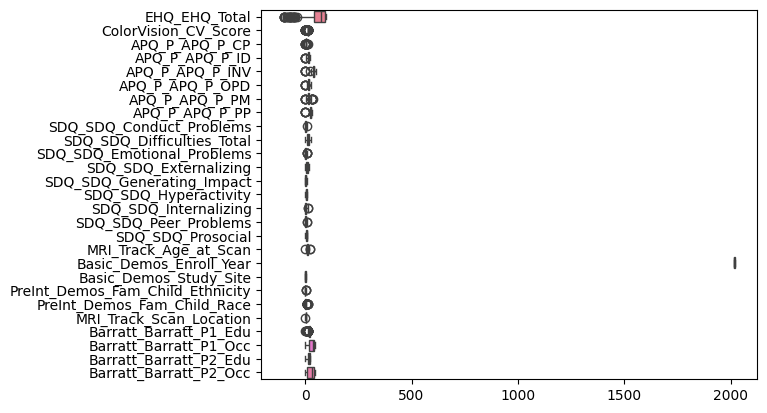

In [209]:
sns.boxplot(train_data, orient='h')
plt.show()

In [210]:
z_scores = zscore(train_data['Basic_Demos_Enroll_Year']) 
train_data = train_data[(z_scores < 3) & (z_scores > -3)]

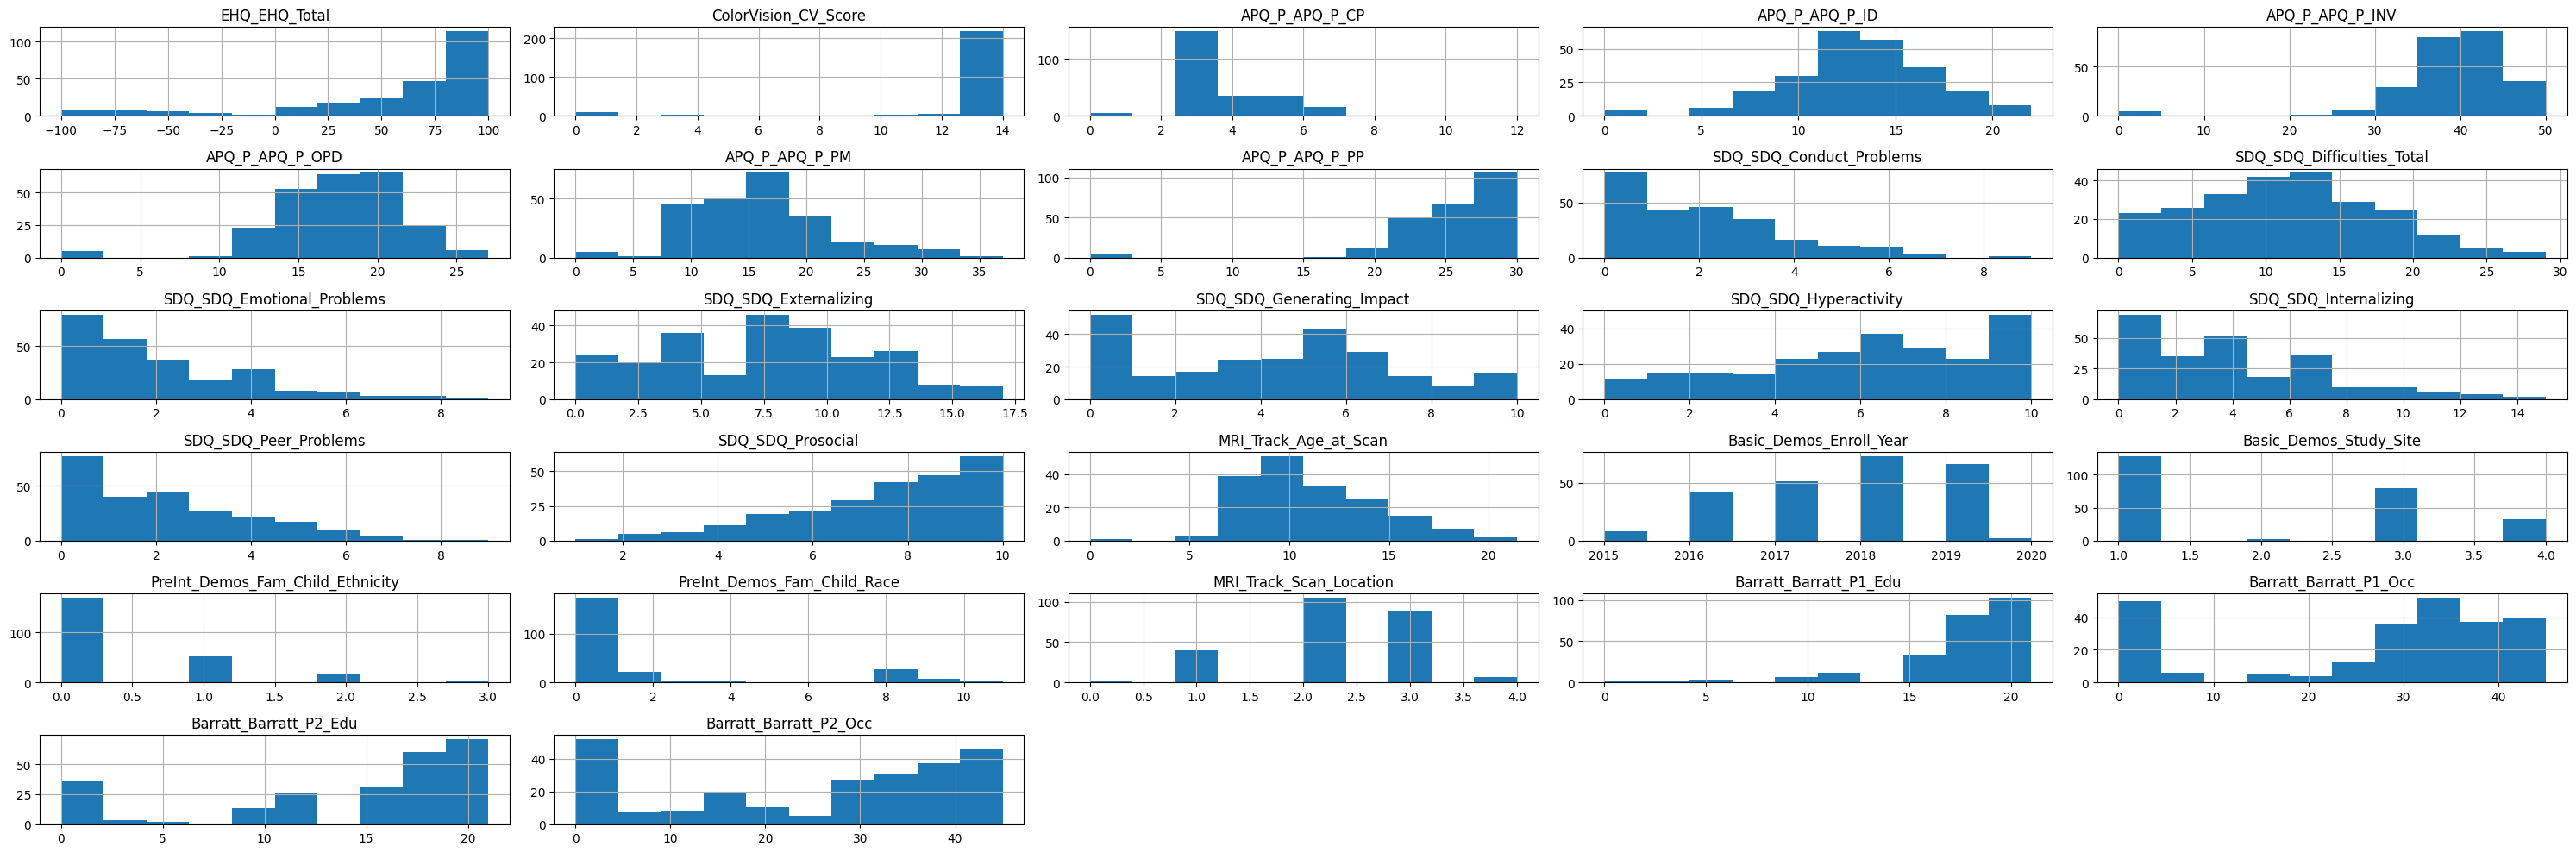

In [211]:
train_data.hist(figsize=(30,10))
plt.tight_layout()
plt.show()

### <span style="font-family: Century Gothic">Clean and Preprocess the data</span>

- <span style="font-family: Century Gothic; font-size: 15px">Handle missing values.</span>
- <span style="font-family: Century Gothic; font-size: 15px">Encode categorical variables.</span>
- <span style="font-family: Century Gothic; font-size: 15px">Normalize/scale numerical features.</span>

In [212]:
# This line of code is filling missing values in the 'MRI_Track_Age_at_Scan' column of the DataFrame 'df_meta' with the median value of that column. The `fillna()` method is used to replace NaN (missing) values with a specified value, in this case, the median of the column. The `inplace=True` parameter ensures that the operation is done on the original DataFrame 'df_meta' without creating a new copy.
train_data.MRI_Track_Age_at_Scan.fillna(train_data.MRI_Track_Age_at_Scan.median(), inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_38528\3309397671.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data.MRI_Track_Age_at_Scan.fillna(train_data.MRI_Track_Age_at_Scan.median(), inplace=True)


In [213]:
# This line of code is filling missing values in the column `PreInt_Demos_Fam_Child_Ethnicity` of the DataFrame `df_meta` with the median value of that column. The `fillna()` method is used to replace missing (NaN) values with a specified value, in this case, the median of the column. The `inplace=True` parameter ensures that the operation is done on the original DataFrame `df_meta` without creating a new copy.
train_data.PreInt_Demos_Fam_Child_Ethnicity.fillna(train_data.PreInt_Demos_Fam_Child_Ethnicity.median(), inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_38528\129628173.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data.PreInt_Demos_Fam_Child_Ethnicity.fillna(train_data.PreInt_Demos_Fam_Child_Ethnicity.median(), inplace=True)


In [214]:
train_data.isnull().sum()

participant_id                      0
EHQ_EHQ_Total                       0
ColorVision_CV_Score                0
APQ_P_APQ_P_CP                      0
APQ_P_APQ_P_ID                      0
APQ_P_APQ_P_INV                     0
APQ_P_APQ_P_OPD                     0
APQ_P_APQ_P_PM                      0
APQ_P_APQ_P_PP                      0
SDQ_SDQ_Conduct_Problems            0
SDQ_SDQ_Difficulties_Total          0
SDQ_SDQ_Emotional_Problems          0
SDQ_SDQ_Externalizing               0
SDQ_SDQ_Generating_Impact           0
SDQ_SDQ_Hyperactivity               0
SDQ_SDQ_Internalizing               0
SDQ_SDQ_Peer_Problems               0
SDQ_SDQ_Prosocial                   0
MRI_Track_Age_at_Scan               0
Basic_Demos_Enroll_Year             0
Basic_Demos_Study_Site              0
PreInt_Demos_Fam_Child_Ethnicity    0
PreInt_Demos_Fam_Child_Race         0
MRI_Track_Scan_Location             0
Barratt_Barratt_P1_Edu              0
Barratt_Barratt_P1_Occ              0
Barratt_Barr

In [215]:
train_data.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,MRI_Track_Age_at_Scan,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
1142,wOuHOTHiQHEA,93.34,13,3,14,40,18,19,23,3,...,11.212639,2019,1,0.0,1,2,21,35,0,0
162,8chKGdmT3rLH,90.00,14,3,14,36,17,20,26,1,...,10.328599,2019,3,0.0,0,2,18,45,0,0
821,glkmphTnHpNB,14.47,14,3,7,41,12,19,29,0,...,17.825119,2018,3,2.0,9,3,18,30,0,0
705,aljzaYpR4j1l,37.87,14,5,14,33,18,15,27,0,...,10.328599,2016,1,0.0,1,1,21,15,18,30
1029,qCAQATAgTtR0,100.00,14,3,20,38,18,14,22,2,...,7.196440,2018,3,0.0,0,3,21,45,18,45


In [216]:
train_data.dtypes

participant_id                       object
EHQ_EHQ_Total                       float64
ColorVision_CV_Score                  int64
APQ_P_APQ_P_CP                        int64
APQ_P_APQ_P_ID                        int64
APQ_P_APQ_P_INV                       int64
APQ_P_APQ_P_OPD                       int64
APQ_P_APQ_P_PM                        int64
APQ_P_APQ_P_PP                        int64
SDQ_SDQ_Conduct_Problems              int64
SDQ_SDQ_Difficulties_Total            int64
SDQ_SDQ_Emotional_Problems            int64
SDQ_SDQ_Externalizing                 int64
SDQ_SDQ_Generating_Impact             int64
SDQ_SDQ_Hyperactivity                 int64
SDQ_SDQ_Internalizing                 int64
SDQ_SDQ_Peer_Problems                 int64
SDQ_SDQ_Prosocial                     int64
MRI_Track_Age_at_Scan               float64
Basic_Demos_Enroll_Year               int64
Basic_Demos_Study_Site                int64
PreInt_Demos_Fam_Child_Ethnicity    float64
PreInt_Demos_Fam_Child_Race     

In [217]:
# This code snippet is performing feature scaling on the numerical columns of the DataFrame `df_meta`.

scaler = StandardScaler()

features = train_data.select_dtypes(include=['float64', 'int64']).columns
train_data[features] = scaler.fit_transform(train_data[features])

In [218]:
train_data.dtypes

participant_id                       object
EHQ_EHQ_Total                       float64
ColorVision_CV_Score                float64
APQ_P_APQ_P_CP                      float64
APQ_P_APQ_P_ID                      float64
APQ_P_APQ_P_INV                     float64
APQ_P_APQ_P_OPD                     float64
APQ_P_APQ_P_PM                      float64
APQ_P_APQ_P_PP                      float64
SDQ_SDQ_Conduct_Problems            float64
SDQ_SDQ_Difficulties_Total          float64
SDQ_SDQ_Emotional_Problems          float64
SDQ_SDQ_Externalizing               float64
SDQ_SDQ_Generating_Impact           float64
SDQ_SDQ_Hyperactivity               float64
SDQ_SDQ_Internalizing               float64
SDQ_SDQ_Peer_Problems               float64
SDQ_SDQ_Prosocial                   float64
MRI_Track_Age_at_Scan               float64
Basic_Demos_Enroll_Year             float64
Basic_Demos_Study_Site              float64
PreInt_Demos_Fam_Child_Ethnicity    float64
PreInt_Demos_Fam_Child_Race     

In [219]:
# For StandardScaler, the mean should be ~0, and the standard deviation should be ~1.

train_data[features].std()

EHQ_EHQ_Total                       1.002073
ColorVision_CV_Score                1.002073
APQ_P_APQ_P_CP                      1.002073
APQ_P_APQ_P_ID                      1.002073
APQ_P_APQ_P_INV                     1.002073
APQ_P_APQ_P_OPD                     1.002073
APQ_P_APQ_P_PM                      1.002073
APQ_P_APQ_P_PP                      1.002073
SDQ_SDQ_Conduct_Problems            1.002073
SDQ_SDQ_Difficulties_Total          1.002073
SDQ_SDQ_Emotional_Problems          1.002073
SDQ_SDQ_Externalizing               1.002073
SDQ_SDQ_Generating_Impact           1.002073
SDQ_SDQ_Hyperactivity               1.002073
SDQ_SDQ_Internalizing               1.002073
SDQ_SDQ_Peer_Problems               1.002073
SDQ_SDQ_Prosocial                   1.002073
MRI_Track_Age_at_Scan               1.002073
Basic_Demos_Enroll_Year             1.002073
Basic_Demos_Study_Site              1.002073
PreInt_Demos_Fam_Child_Ethnicity    1.002073
PreInt_Demos_Fam_Child_Race         1.002073
MRI_Track_

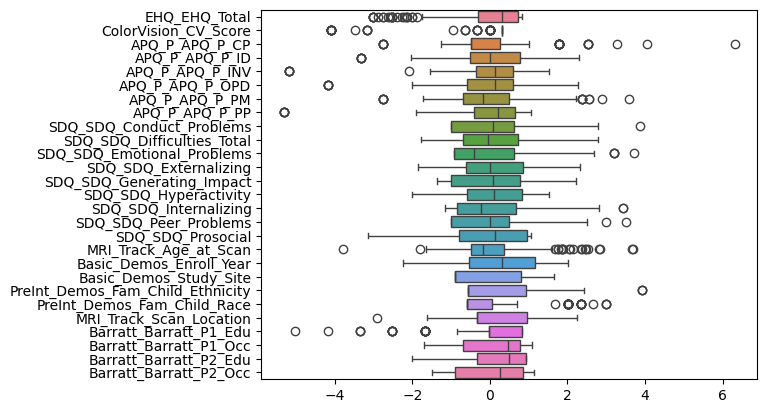

In [220]:
sns.boxplot(train_data, orient='h')
plt.show()

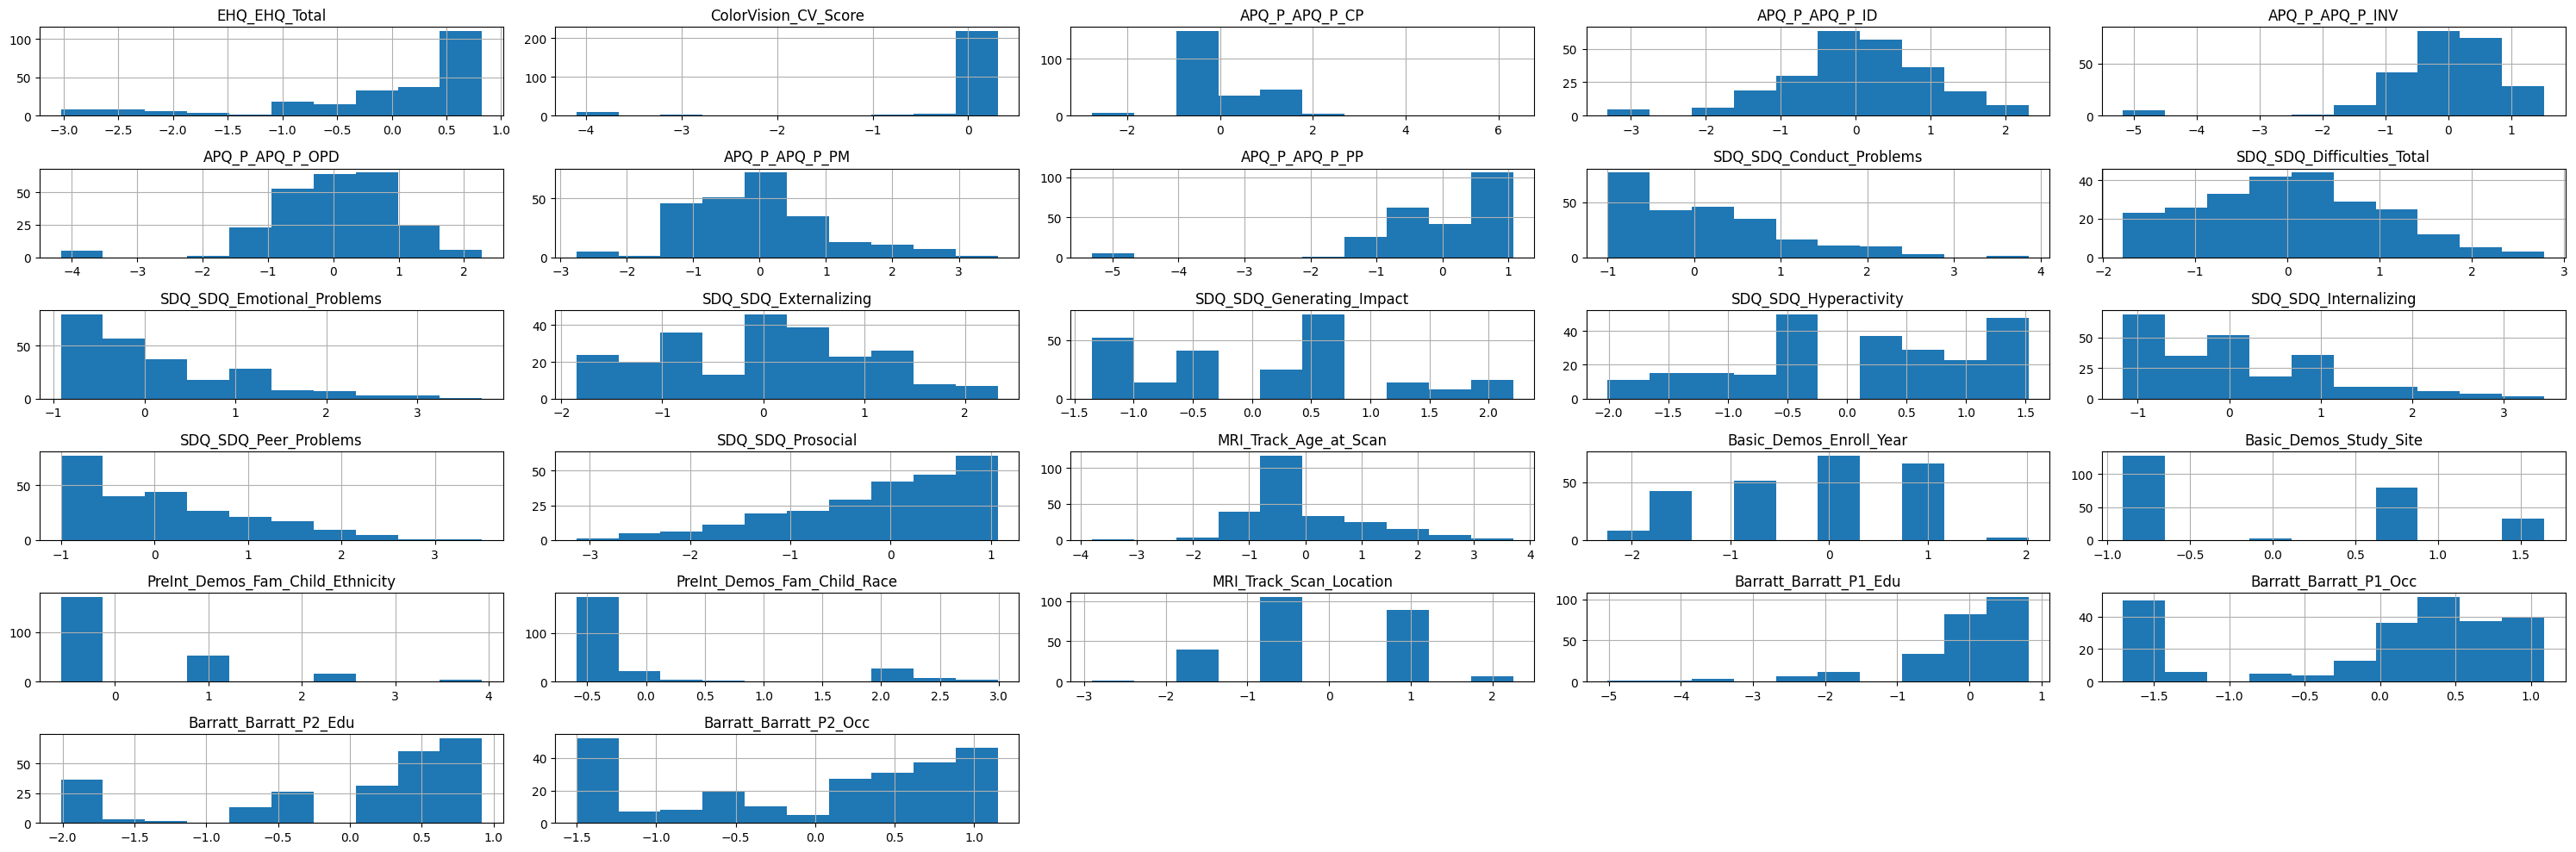

In [221]:
train_data.hist(figsize=(30,10))
plt.tight_layout()
plt.show()

In [222]:
train_data.to_excel('METADATA.xlsx', index=False)

### <span style="font-family: Century Gothic">Functional Connectodome</span>
#### <p style="font-family: Century Gothic; font-size: 15px">Purpose: Contains fMRI data (functional connectivity between brain regions).</p>
- <span style="font-family: Century Gothic; font-size: 15px">Inspect the file to understand the structure (e.g., rows = subjects, columns = brain region pairs).</span>
- <span style="font-family: Century Gothic; font-size: 15px">Check for missing values and inconsistencies.</span>
- <span style="font-family: Century Gothic; font-size: 15px">Normalize or standardize the data if necessary.</span>


In [107]:
df_matric.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


In [111]:
np.mean(df_matric.isnull().sum())

np.float64(0.0)

In [112]:
df_matric.shape

(1213, 19901)